In [1]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

# True optimum
w_true = 3.0

# Starting weight
w_sgd = torch.tensor([8.0], requires_grad=True)
w_adam = torch.tensor([8.0], requires_grad=True)

# Optimizers
sgd = torch.optim.SGD([w_sgd], lr=0.1)
adam = torch.optim.Adam([w_adam], lr=0.1)

# Logs
ws_sgd, ws_adam = [], []
losses_sgd, losses_adam = [], []

# Training loop
for step in range(100):
    # Noisy quadratic loss
    noise = torch.randn(1) * 0.5
    loss_sgd = (w_sgd - w_true)**2 + noise
    loss_adam = (w_adam - w_true)**2 + noise

    # SGD
    sgd.zero_grad()
    loss_sgd.backward(retain_graph=True)
    sgd.step()

    # Adam
    adam.zero_grad()
    loss_adam.backward()
    adam.step()

    # Log
    ws_sgd.append(w_sgd.item())
    ws_adam.append(w_adam.item())
    losses_sgd.append(loss_sgd.item())
    losses_adam.append(loss_adam.item())


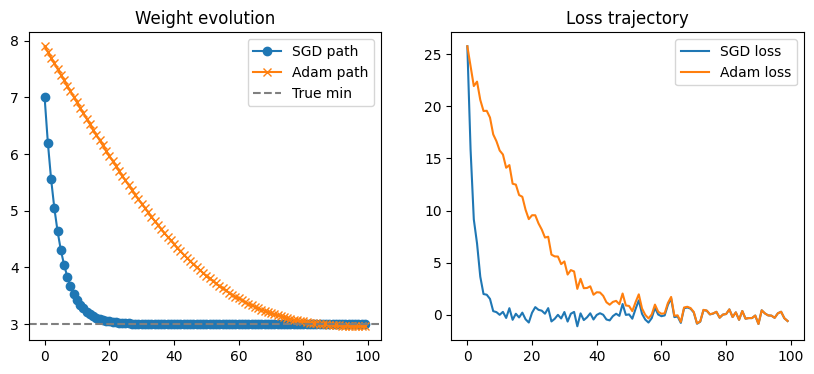

In [2]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(ws_sgd, label="SGD path", marker='o')
plt.plot(ws_adam, label="Adam path", marker='x')
plt.axhline(y=w_true, color='gray', linestyle='--', label='True min')
plt.title("Weight evolution")
plt.legend()

plt.subplot(1,2,2)
plt.plot(losses_sgd, label="SGD loss")
plt.plot(losses_adam, label="Adam loss")
plt.title("Loss trajectory")
plt.legend()
plt.show()
